In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    # Sua implementação deve começar aqui

    # quando implemenar a função, remova o pass
    pass



In [ ]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

In [ ]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()




In [ ]:
import cv2
import numpy as np

def identifica_bandeira(img):
    resultado = []
    

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    
    cores_bandeiras = {
        "monaco": ([0, 50, 70], [10, 255, 255]),  
        "peru": ([0, 50, 50], [10, 255, 255]),  
        "singapura": ([0, 50, 50], [10, 255, 255]),  
        "irlanda": ([35, 50, 50], [85, 255, 255]),  
        "italia": ([35, 50, 50], [85, 255, 255]),  
        "turquia": ([0, 0, 200], [180, 60, 255]),  
    }
    
    for pais, (lower, upper) in cores_bandeiras.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)
        
        
        mascara = cv2.inRange(hsv, lower, upper)
        
        contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contorno in contornos:
            x, y, w, h = cv2.boundingRect(contorno)
            if w > 30 and h > 20:  
                resultado.append((pais, (x, y), (x + w, y + h)))
    

    resultado_peru = []
    mascara_vermelho = cv2.inRange(hsv, np.array([0, 50, 50], dtype=np.uint8), np.array([10, 255, 255], dtype=np.uint8))
    mascara_branco = cv2.inRange(hsv, np.array([0, 0, 180], dtype=np.uint8), np.array([180, 20, 255], dtype=np.uint8))
    
   
    contornos_vermelho, _ = cv2.findContours(mascara_vermelho, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contornos_branco, _ = cv2.findContours(mascara_branco, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contorno in contornos_vermelho:
        x, y, w, h = cv2.boundingRect(contorno)
        if w > 50 and h > 20:  
            resultado_peru.append(("peru", (x, y), (x + w, y + h)))
    
    for contorno in contornos_branco:
        x, y, w, h = cv2.boundingRect(contorno)
        if w > 50 and h > 20:  
            resultado_peru.append(("peru", (x, y), (x + w, y + h)))

    return resultado + resultado_peru

def draw_bandeiras(resultado, img):
    for pais, (x1, y1), (x2, y2) in resultado:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, pais, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return img


Bandeiras identificadas em teste1.png: [('turquia', (193, 585), (456, 673)), ('turquia', (217, 508), (259, 574)), ('turquia', (726, 266), (984, 369)), ('turquia', (206, 121), (293, 295)), ('peru', (193, 585), (457, 673)), ('peru', (726, 266), (984, 369)), ('peru', (206, 121), (293, 295))]


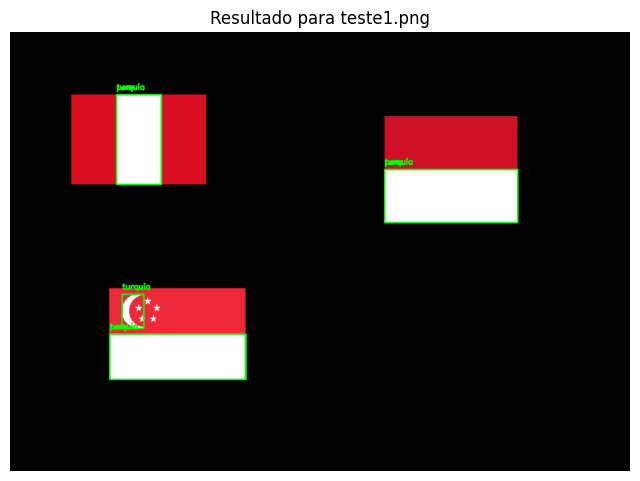

Bandeiras identificadas em teste2.png: [('irlanda', (705, 589), (794, 722)), ('irlanda', (343, 298), (432, 475)), ('italia', (705, 589), (794, 722)), ('italia', (343, 298), (432, 475)), ('turquia', (794, 590), (882, 722)), ('turquia', (431, 299), (520, 474)), ('peru', (794, 590), (882, 722)), ('peru', (432, 299), (519, 474))]


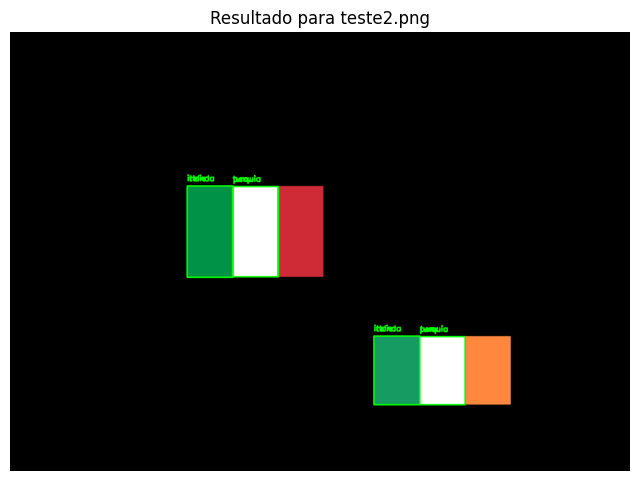

Bandeiras identificadas em teste3.png: [('turquia', (838, 446), (925, 619)), ('turquia', (126, 349), (390, 437)), ('turquia', (150, 272), (193, 338)), ('peru', (838, 446), (925, 620)), ('peru', (126, 349), (390, 437))]


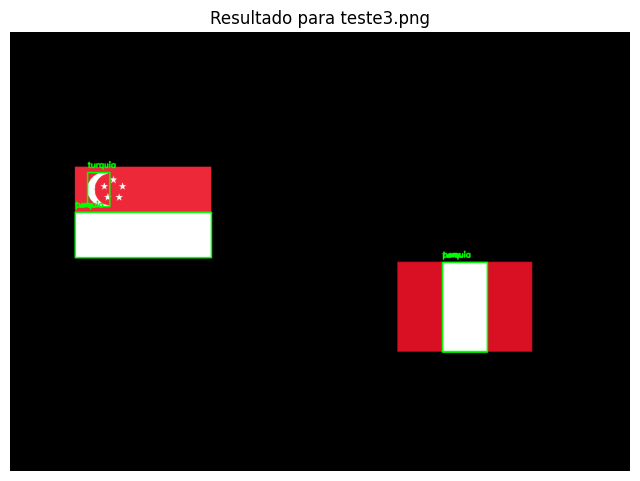

Bandeiras identificadas em teste4.png: [('irlanda', (84, 477), (173, 654)), ('irlanda', (752, 114), (841, 247)), ('italia', (84, 477), (173, 654)), ('italia', (752, 114), (841, 247)), ('turquia', (855, 497), (942, 671)), ('turquia', (172, 478), (260, 653)), ('turquia', (841, 114), (929, 247)), ('peru', (855, 497), (942, 671)), ('peru', (173, 477), (260, 653)), ('peru', (841, 114), (929, 247))]


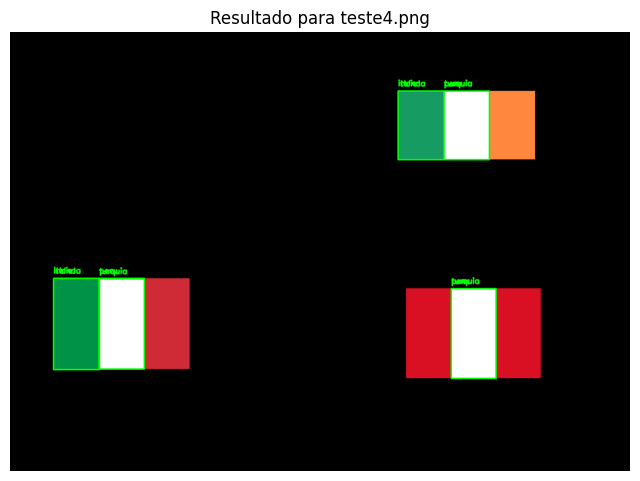

In [ ]:

img_dir = "img"
imagens = ["teste1.png", "teste2.png", "teste3.png", "teste4.png"]

for nome_img in imagens:
    img_path = os.path.join(img_dir, nome_img)
    img = cv2.imread(img_path)

    if img is None:
        print(f"Erro: Imagem {img_path} não encontrada!")
    else:
        resultado = identifica_bandeira(img)
        print(f"Bandeiras identificadas em {nome_img}: {resultado}")  
        
        
        img_result = draw_bandeiras(resultado, img)
        
        plt.figure(figsize=(8, 6))
        plt.title(f"Resultado para {nome_img}")
        plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()
